In [65]:
# drive mount 
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


## Imports

In [66]:
import os
os.chdir('/content/drive/MyDrive/INF8808 - Visualisation de données')

In [93]:
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import pandas as pd
import json
#import missingno as msno

In [95]:
!ls

Archive  dataset.csv  exercices_python	Projet_PartiePerso.ipynb  TP4


In [2]:
data=pd.read_csv('assets/dataset.csv', delimiter=";", encoding='latin-1')
data.head(5)

import preprocess
data_IC = data[data["Form_juridique"] == "C"]
data_IP = data[data["Form_juridique"] == "P"]
data_S = data[data["Form_juridique"] == "S"]

data_IC = preprocess.clean_names(data_IC)
data_IC = preprocess.remove_missing_values(data_IC, "IC")
data_IC = preprocess.convert_types(data_IC, "IC")
data_IC = preprocess.sort_by_yr(data_IC)

data_IP = preprocess.clean_names(data_IP)
data_IP = preprocess.remove_missing_values(data_IP, "IP")
data_IP = preprocess.convert_types(data_IP, "IP")
data_IP = preprocess.sort_by_yr(data_IP)

data_S = preprocess.clean_names(data_S)
data_S = preprocess.remove_missing_values(data_S, None)
data_S = preprocess.convert_types(data_S, None)
data_S = preprocess.sort_by_yr(data_S)

data_whole = preprocess.combine_dfs(data_IC, data_IP, data_S)


data_whole.columns

Lignes avant la suppression des valeurs manquantes :  120570
Lignes après la suppression des valeurs manquantes :  82543
Lignes avant la suppression des valeurs manquantes :  66525
Lignes après la suppression des valeurs manquantes :  7207
Lignes avant la suppression des valeurs manquantes :  4265
Lignes après la suppression des valeurs manquantes :  1230


Index(['Num_contribuable', 'Year', 'Taille', 'Form_juridique', 'Region',
       'Produire_IP', 'Produire_IC', 'Produire_TVQ', 'Produire_RAS',
       'Declarer_IP', 'Declarer_IC', 'Declarer_TVQ', 'Declarer_RAS',
       'Mode_transmission'],
      dtype='object')

In [7]:
from  itertools import combinations
import numpy as np
data_year_region_sum = preprocess.group_and_get_sum_per_obligation(['Year', 'Region','Mode_transmission','Form_juridique'], data_whole)


list_names = ['Declarer_IP_sans_erreurs','Declarer_IC_sans_erreurs','Declarer_RAS_sans_erreurs','Declarer_TVQ_sans_erreurs','Produire_IP_à_temps',
'Produire_IC_à_temps','Produire_RAS_à_temps','Produire_TVQ_à_temps']


# data_year_region_sum  = data_year_region_sum .join(pd.concat([data_year_region_sum [a].div(data_year_region_sum [b]).rename(f'{a}/{b}') 
#                          for a, b in combinations(list_names, 2) if a.startswith('Declarer') and b.startswith('Produire')], 1))

# data_year_region_sum


# buble_data = data_year_region_sum.iloc[:, [0, 1,2,3,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]]
# buble_data.replace([np.inf, -np.inf], 0, inplace=True)
# buble_data.fillna(0)
# buble_data

data_pd = data_whole
data_pd

import math

def buble_processing(data_pd,year,region,trans):
    if region =="Tout" and trans =="Tout" and year =="Tout":
        # Trans and Region and year n est pas selectionnee.
        grouped_data =  data_pd[ data_pd["Declarer_RAS"] == 1].groupby(['Form_juridique']).agg({"Produire_IP": ["sum", "count"]}).reset_index()
        grouped_data = grouped_data
    elif year =="Tout" and region =="Tout":
        # Year and Region n est pas selectionnee.
        grouped_data =  data_pd[ data_pd["Declarer_RAS"] == 1].groupby(['Form_juridique',"Mode_transmission"]).agg({"Produire_IP": ["sum", "count"]}).reset_index()
        grouped_data = grouped_data[(data_pd['Mode_transmission'] == trans)]
    elif year =="Tout" and trans =="Tout":
        # Year and Trans n est pas selectionnee.
        grouped_data =  data_pd[ data_pd["Declarer_RAS"] == 1].groupby(['Form_juridique',"Region"]).agg({"Produire_IP": ["sum", "count"]}).reset_index()
        grouped_data = grouped_data[(grouped_data['Region'] == region)]
    elif region =="Tout" and trans =="Tout":
        # Trans and Region n est pas selectionnee.
        grouped_data =  data_pd[ data_pd["Declarer_RAS"] == 1].groupby(['Form_juridique',"Year"]).agg({"Produire_IP": ["sum", "count"]}).reset_index()
        grouped_data = grouped_data[(grouped_data['Year'] == year)]
    elif year =="Tout":
        # Year n est pas selectionnee.
        grouped_data =  data_pd[ data_pd["Declarer_RAS"] == 1].groupby(['Form_juridique',"Region","Mode_transmission"]).agg({"Produire_IP": ["sum", "count"]}).reset_index()
        grouped_data = grouped_data[(grouped_data['Region'] == region) & (data_pd['Mode_transmission'] == trans)]
    elif region =="Tout":
        # Region n est pas selectionnee.
        grouped_data =  data_pd[ data_pd["Declarer_RAS"] == 1].groupby(['Form_juridique',"Year","Mode_transmission"]).agg({"Produire_IP": ["sum", "count"]}).reset_index()
        grouped_data = grouped_data[(grouped_data['Year'] == year) & (data_pd['Mode_transmission'] == trans)]
    elif trans =="Tout":
        # Mode_transmission n est pas selectionnee.
        grouped_data =  data_pd[ data_pd["Declarer_RAS"] == 1].groupby(['Form_juridique',"Year","Region"]).agg({"Produire_IP": ["sum", "count"]}).reset_index()
        grouped_data = grouped_data[(grouped_data['Year'] == year) & (data_pd['Region'] == region)]
    else:
        grouped_data =  data_pd[ data_pd["Declarer_RAS"] == 1].groupby(['Form_juridique',"Region","Year","Mode_transmission"]).agg({"Produire_IP": ["sum", "count"]}).reset_index()
        grouped_data = grouped_data[(data_pd['Mode_transmission'] == trans) & (grouped_data['Year'] == year) &  (grouped_data['Region'] == region)]
    ############################ Declarer RAS #########################################
 

    #grouped_data = data_pd[data_pd["Declarer_RAS"] == 1].groupby(['Year', 'Region','Mode_transmission','Form_juridique']).agg({"Produire_IP": ["sum", "count"]})
    #  grouped_data =  data_filtered[ data_filtered["Declarer_RAS"] == 1].groupby(['Form_juridique']).agg({"Produire_IP": ["sum", "count"]})
    # # Reset index
    # data_filtered = data_filtered.reset_index()
    # # Calculate the ratio

    grouped_data["Declarer_RAS/Produit_IP"] = grouped_data[("Produire_IP", "sum")] / grouped_data[("Produire_IP", "count")]
    grouped_data["Declarer_RAS/Produit_IP"]= grouped_data["Declarer_RAS/Produit_IP"].apply(lambda x: 0 if math.isnan(x) else x)
    # # Drop unnecessary columns
    grouped_data = grouped_data.drop(columns=[("Produire_IP", "sum"), ("Produire_IP", "count")])


    # Calculate the counts for Produire_RAS == 1 and Produire_RAS == 0 for each region, year, taille, and transmission
    grouped_data1 = data_pd[data_pd["Declarer_RAS"] == 1].groupby(['Year', 'Region','Mode_transmission','Form_juridique']).agg({"Produire_RAS": ["sum", "count"]})
    # # Reset index
    grouped_data1 = grouped_data1.reset_index()

    # # Calculate the ratio
    grouped_data1["Declarer_RAS/Produit_RAS"] = grouped_data1[("Produire_RAS", "sum")] / grouped_data1[("Produire_RAS", "count")]
    grouped_data1["Declarer_RAS/Produit_RAS"]= grouped_data1["Declarer_RAS/Produit_RAS"].apply(lambda x: 0 if math.isnan(x) else x)
    # # Drop unnecessary columns
    grouped_data1 = grouped_data1.drop(columns=[("Produire_RAS", "sum"), ("Produire_RAS", "count")])



    # Calculate the counts for Produire_TVQ == 1 and Produire_TVQ == 0 for each region, year, taille, and transmission
    grouped_data2 = data_pd[data_pd["Declarer_RAS"] == 1].groupby(['Year', 'Region','Mode_transmission','Form_juridique']).agg({"Produire_TVQ": ["sum", "count"]})
    # # Reset index
    grouped_data2 = grouped_data2.reset_index()
    # # Calculate the ratio
    grouped_data2["Declarer_RAS/Produit_TVQ"] = grouped_data2[("Produire_TVQ", "sum")] / grouped_data2[("Produire_TVQ", "count")]
    grouped_data2["Declarer_RAS/Produit_TVQ"]=grouped_data2["Declarer_RAS/Produit_TVQ"].apply(lambda x: 0 if math.isnan(x) else x)
    # # Drop unnecessary columns
    grouped_data2 = grouped_data2.drop(columns=[("Produire_TVQ", "sum"), ("Produire_TVQ", "count")])



    # Calculate the counts for Produire_IC== 1 and Produire_IC == 0 for each region, year, taille, and transmission
    grouped_data3 = data_pd[data_pd["Declarer_RAS"] == 1].groupby(['Year', 'Region','Mode_transmission','Form_juridique']).agg({"Produire_IC": ["sum", "count"]})
    # # Reset index
    grouped_data3 = grouped_data3.reset_index()
    # # Calculate the ratio
    grouped_data3["Declarer_RAS/Produit_IC"] = grouped_data3[("Produire_IC", "sum")] / grouped_data3[("Produire_IC", "count")]
    grouped_data3["Declarer_RAS/Produit_IC"] =grouped_data3["Declarer_RAS/Produit_IC"].apply(lambda x: 0 if math.isnan(x) else x)
    # # Drop unnecessary columns
    grouped_data3 = grouped_data3.drop(columns=[("Produire_IC", "sum"), ("Produire_IC", "count")])

    ############################ Declarer IP #########################################

    # Calculate the counts for Produire_IP == 1 and Produire_IP == 0 for each region, year, taille, and transmission
    grouped_data4 = data_pd[data_pd["Declarer_IP"] == 1].groupby(['Year', 'Region','Mode_transmission','Form_juridique']).agg({"Produire_IP": ["sum", "count"]})
    # # Reset index
    grouped_data4 = grouped_data4.reset_index()
    # # Calculate the ratio
    grouped_data4["Declarer_IP/Produit_IP"] = grouped_data4[("Produire_IP", "sum")] / grouped_data4[("Produire_IP", "count")]
    grouped_data4["Declarer_IP/Produit_IP"] =grouped_data4["Declarer_IP/Produit_IP"].apply(lambda x: 0 if math.isnan(x) else x)
    # # Drop unnecessary columns
    grouped_data4 = grouped_data4.drop(columns=[("Produire_IP", "sum"), ("Produire_IP", "count")])


    # Calculate the counts for Produire_RAS == 1 and Produire_RAS == 0 for each region, year, taille, and transmission
    grouped_data5 = data_pd[data_pd["Declarer_IP"] == 1].groupby(['Year', 'Region','Mode_transmission','Form_juridique']).agg({"Produire_RAS": ["sum", "count"]})
    # # Reset index
    grouped_data5 = grouped_data5.reset_index()
    # # Calculate the ratio
    grouped_data5["Declarer_IP/Produit_RAS"] = grouped_data5[("Produire_RAS", "sum")] / grouped_data5[("Produire_RAS", "count")]
    grouped_data5["Declarer_IP/Produit_RAS"] =grouped_data5["Declarer_IP/Produit_RAS"].apply(lambda x: 0 if math.isnan(x) else x)
    # # Drop unnecessary columns
    grouped_data5 = grouped_data5.drop(columns=[("Produire_RAS", "sum"), ("Produire_RAS", "count")])

    # Calculate the counts for Produire_TVQ == 1 and Produire_TVQ == 0 for each region, year, taille, and transmission
    grouped_data6 = data_pd[data_pd["Declarer_IP"] == 1].groupby(['Year', 'Region','Mode_transmission','Form_juridique']).agg({"Produire_TVQ": ["sum", "count"]})
    # # Reset index
    grouped_data6 = grouped_data6.reset_index()
    # # Calculate the ratio
    grouped_data6["Declarer_IP/Produit_TVQ"] = grouped_data6[("Produire_TVQ", "sum")] / grouped_data6[("Produire_TVQ", "count")]
    grouped_data6["Declarer_IP/Produit_TVQ"] =grouped_data6["Declarer_IP/Produit_TVQ"].apply(lambda x: 0 if math.isnan(x) else x)
    # # Drop unnecessary columns
    grouped_data6 = grouped_data6.drop(columns=[("Produire_TVQ", "sum"), ("Produire_TVQ", "count")])

    # Calculate the counts for Produire_IC== 1 and Produire_IC == 0 for each region, year, taille, and transmission
    grouped_data7 = data_pd[data_pd["Declarer_IP"] == 1].groupby(['Year', 'Region','Mode_transmission','Form_juridique']).agg({"Produire_IC": ["sum", "count"]})
    # # Reset index
    grouped_data7 = grouped_data7.reset_index()
    # # Calculate the ratio
    grouped_data7["Declarer_IP/Produit_IC"] = grouped_data7[("Produire_IC", "sum")] / grouped_data7[("Produire_IC", "count")]
    grouped_data7["Declarer_IP/Produit_IC"]=grouped_data7["Declarer_IP/Produit_IC"].apply(lambda x: 0 if math.isnan(x) else x)
    # # Drop unnecessary columns
    grouped_data7 = grouped_data7.drop(columns=[("Produire_IC", "sum"), ("Produire_IC", "count")])

    ############################ Declarer IC  #########################################

    # Calculate the counts for Produire_IP == 1 and Produire_IP == 0 for each region, year, taille, and transmission
    grouped_data8 = data_pd[data_pd["Declarer_IC"] == 1].groupby(['Year', 'Region','Mode_transmission','Form_juridique']).agg({"Produire_IP": ["sum", "count"]})
    # # Reset index
    grouped_data8 = grouped_data8.reset_index()
    # # Calculate the ratio
    grouped_data8["Declarer_IC/Produit_IP"] = grouped_data8[("Produire_IP", "sum")] / grouped_data8[("Produire_IP", "count")]
    grouped_data8["Declarer_IC/Produit_IP"] =grouped_data8["Declarer_IC/Produit_IP"].apply(lambda x: 0 if math.isnan(x) else x)
    # # Drop unnecessary columns
    grouped_data8 = grouped_data8.drop(columns=[("Produire_IP", "sum"), ("Produire_IP", "count")])


    # Calculate the counts for Produire_RAS == 1 and Produire_RAS == 0 for each region, year, taille, and transmission
    grouped_data9 = data_pd[data_pd["Declarer_IC"] == 1].groupby(['Year', 'Region','Mode_transmission','Form_juridique']).agg({"Produire_RAS": ["sum", "count"]})
    # # Reset index
    grouped_data9 = grouped_data9.reset_index()
    # # Calculate the ratio
    grouped_data9["Declarer_IC/Produit_RAS"] = grouped_data9[("Produire_RAS", "sum")] / grouped_data9[("Produire_RAS", "count")]
    grouped_data9["Declarer_IC/Produit_RAS"] =grouped_data9["Declarer_IC/Produit_RAS"].apply(lambda x: 0 if math.isnan(x) else x)
    # # Drop unnecessary columns
    grouped_data9 = grouped_data9.drop(columns=[("Produire_RAS", "sum"), ("Produire_RAS", "count")])



    # Calculate the counts for Produire_TVQ == 1 and Produire_TVQ == 0 for each region, year, taille, and transmission
    grouped_data10 = data_pd[data_pd["Declarer_IC"] == 1].groupby(['Year', 'Region','Mode_transmission','Form_juridique']).agg({"Produire_TVQ": ["sum", "count"]})
    # # Reset index
    grouped_data10 = grouped_data10.reset_index()
    # # Calculate the ratio
    grouped_data10["Declarer_IC/Produit_TVQ"] = grouped_data10[("Produire_TVQ", "sum")] / grouped_data10[("Produire_TVQ", "count")]
    grouped_data10["Declarer_IC/Produit_TVQ"] =grouped_data10["Declarer_IC/Produit_TVQ"].apply(lambda x: 0 if math.isnan(x) else x)
    # # Drop unnecessary columns
    grouped_data10 = grouped_data10.drop(columns=[("Produire_TVQ", "sum"), ("Produire_TVQ", "count")])

    # Calculate the counts for Produire_IC== 1 and Produire_IC == 0 for each region, year, taille, and transmission
    grouped_data11 = data_pd[data_pd["Declarer_IC"] == 1].groupby(['Year', 'Region','Mode_transmission','Form_juridique']).agg({"Produire_IC": ["sum", "count"]})
    # # Reset index
    grouped_data11 = grouped_data11.reset_index()
    # # Calculate the ratio
    grouped_data11["Declarer_IC/Produit_IC"] = grouped_data11[("Produire_IC", "sum")] / grouped_data11[("Produire_IC", "count")]
    grouped_data11["Declarer_IC/Produit_IC"]=grouped_data11["Declarer_IC/Produit_IC"].apply(lambda x: 0 if math.isnan(x) else x)
    # # Drop unnecessary columns
    grouped_data11 = grouped_data11.drop(columns=[("Produire_IC", "sum"), ("Produire_IC", "count")])


    ############################ Declarer TVQ  #########################################

    # Calculate the counts for Produire_IP == 1 and Produire_IP == 0 for each region, year, taille, and transmission
    grouped_data12 = data_pd[data_pd["Declarer_TVQ"] == 1].groupby(['Year', 'Region','Mode_transmission','Form_juridique']).agg({"Produire_IP": ["sum", "count"]})
    # # Reset index
    grouped_data12 = grouped_data12.reset_index()
    # # Calculate the ratio
    grouped_data12["Declarer_TVQ/Produit_IP"] = grouped_data12[("Produire_IP", "sum")] / grouped_data12[("Produire_IP", "count")]
    grouped_data12["Declarer_TVQ/Produit_IP"]= grouped_data12["Declarer_TVQ/Produit_IP"].apply(lambda x: 0 if math.isnan(x) else x)
    # # Drop unnecessary columns
    grouped_data12 = grouped_data12.drop(columns=[("Produire_IP", "sum"), ("Produire_IP", "count")])


    # Calculate the counts for Produire_RAS == 1 and Produire_RAS == 0 for each region, year, taille, and transmission
    grouped_data13 = data_pd[data_pd["Declarer_TVQ"] == 1].groupby(['Year', 'Region','Mode_transmission','Form_juridique']).agg({"Produire_RAS": ["sum", "count"]})
    # # Reset index
    grouped_data13 = grouped_data13.reset_index()
    # # Calculate the ratio
    grouped_data13["Declarer_TVQ/Produit_RAS"] = grouped_data13[("Produire_RAS", "sum")] / grouped_data13[("Produire_RAS", "count")]
    grouped_data13["Declarer_TVQ/Produit_RAS"] =grouped_data13["Declarer_TVQ/Produit_RAS"].apply(lambda x: 0 if math.isnan(x) else x)
    # # Drop unnecessary columns
    grouped_data13 = grouped_data13.drop(columns=[("Produire_RAS", "sum"), ("Produire_RAS", "count")])



    # Calculate the counts for Produire_TVQ == 1 and Produire_TVQ == 0 for each region, year, taille, and transmission
    grouped_data14 = data_pd[data_pd["Declarer_TVQ"] == 1].groupby(['Year', 'Region','Mode_transmission','Form_juridique']).agg({"Produire_TVQ": ["sum", "count"]})
    # # Reset index
    grouped_data14 = grouped_data14.reset_index()
    # # Calculate the ratio
    grouped_data14["Declarer_TVQ/Produit_TVQ"] = grouped_data14[("Produire_TVQ", "sum")] / grouped_data14[("Produire_TVQ", "count")]
    grouped_data14["Declarer_TVQ/Produit_TVQ"] =grouped_data14["Declarer_TVQ/Produit_TVQ"].apply(lambda x: 0 if math.isnan(x) else x)
    # # Drop unnecessary columns
    grouped_data14 = grouped_data14.drop(columns=[("Produire_TVQ", "sum"), ("Produire_TVQ", "count")])

    # Calculate the counts for Produire_IC== 1 and Produire_IC == 0 for each region, year, taille, and transmission
    grouped_data15 = data_pd[data_pd["Declarer_TVQ"] == 1].groupby(['Year', 'Region','Mode_transmission','Form_juridique']).agg({"Produire_IC": ["sum", "count"]})
    # # Reset index
    grouped_data15 = grouped_data15.reset_index()
    # # Calculate the ratio
    grouped_data15["Declarer_TVQ/Produit_IC"] = grouped_data15[("Produire_IC", "sum")] / grouped_data15[("Produire_IC", "count")]
    grouped_data15["Declarer_TVQ/Produit_IC"]= grouped_data15["Declarer_TVQ/Produit_IC"].apply(lambda x: 0 if math.isnan(x) else x)
    # # Drop unnecessary columns
    grouped_data15 = grouped_data15.drop(columns=[("Produire_IC", "sum"), ("Produire_IC", "count")])


    # Merging data 

    grouped_data["Declarer_RAS/Produit_RAS"] =grouped_data1["Declarer_RAS/Produit_RAS"]
    grouped_data["Declarer_RAS/Produit_TVQ"] =grouped_data2["Declarer_RAS/Produit_TVQ"]
    grouped_data["Declarer_RAS/Produit_IC"] =grouped_data3["Declarer_RAS/Produit_IC"]
    grouped_data["Declarer_IP/Produit_RAS"] =grouped_data5["Declarer_IP/Produit_RAS"]
    grouped_data["Declarer_IP/Produit_IP"] = grouped_data4["Declarer_IP/Produit_IP"]
    grouped_data["Declarer_IP/Produit_TVQ"] =grouped_data6["Declarer_IP/Produit_TVQ"]
    grouped_data["Declarer_IP/Produit_IC"] =grouped_data7["Declarer_IP/Produit_IC"]
    grouped_data["Declarer_IC/Produit_RAS"]=grouped_data9["Declarer_IC/Produit_RAS"]
    grouped_data["Declarer_IC/Produit_IP"]=grouped_data8["Declarer_IC/Produit_IP"]
    grouped_data["Declarer_IC/Produit_TVQ"]=grouped_data10["Declarer_IC/Produit_TVQ"]
    grouped_data["Declarer_IC/Produit_IC"]=grouped_data11["Declarer_IC/Produit_IC"]
    grouped_data["Declarer_TVQ/Produit_RAS"]=grouped_data13["Declarer_TVQ/Produit_RAS"]
    grouped_data["Declarer_TVQ/Produit_IP"]=grouped_data12["Declarer_TVQ/Produit_IP"]
    grouped_data["Declarer_TVQ/Produit_TVQ"]=grouped_data14["Declarer_TVQ/Produit_TVQ"]
    grouped_data["Declarer_TVQ/Produit_IC"]=grouped_data15["Declarer_TVQ/Produit_IC"]

    bublechart_data = grouped_data
    bublechart_data = bublechart_data.replace(np.nan, 0)
    bublechart_data
    return bublechart_data


#print(data_whole)
ts2 = buble_processing(data_whole,"Tout","Tout","Tout")
#data_pd = data_whole
#grouped_data =  data_pd[ data_pd["Declarer_RAS"] == 1].groupby(['Form_juridique',"Year"]).agg({"Produire_IP": ["sum", "count"]}).reset_index()
#data_filtered = grouped_data[(grouped_data['Year'] == 2014)]
#data_filtered
ts2




,Form_juridique,Declarer_RAS/Produit_IP,Declarer_RAS/Produit_RAS,Declarer_RAS/Produit_TVQ,Declarer_RAS/Produit_IC,Declarer_IP/Produit_RAS,Declarer_IP/Produit_IP,Declarer_IP/Produit_TVQ,Declarer_IP/Produit_IC,Declarer_IC/Produit_RAS,Declarer_IC/Produit_IP,Declarer_IC/Produit_TVQ,Declarer_IC/Produit_IC,Declarer_TVQ/Produit_RAS,Declarer_TVQ/Produit_IP,Declarer_TVQ/Produit_TVQ,Declarer_TVQ/Produit_IC
,,,,,,,,,,,,,,,,,
0,C,0.000000,0.00000,0.666667,0.0,0.0,0.50,0.25,0,0.414894,0,0.329787,0.553191,0.333333,0.000000,0.666667,0.000000
1,P,0.468721,0.45122,0.378049,0.5,0.0,0.00,1.00,0,1.000000,0,0.000000,0.000000,0.392857,0.000000,0.404762,0.452381
2,S,0.000000,0.12500,0.250000,0.0,0.2,0.35,0.55,0,0.333333,0,0.666667,0.000000,0.000000,0.444444,0.222222,0.000000


In [8]:
def filter_bubble_data(df,year,trans,form,region):
    ts = buble_processing(df,year,region,trans)
    filtered_df = ts[(ts['Form_juridique'] == form)]
    data = list(map(lambda x : (x[0].split("/")[0],x[0].split("/")[1],filtered_df [x].values[0]),list(filtered_df.columns)[4:]))
    dataframe = pd.DataFrame(data,columns=["Declarer","Produire","Ratio"])
    return dataframe

other = filter_bubble_data(data_whole,"Tout","Tout","P","Tout")
other



,Declarer,Produire,Ratio
0,Declarer_RAS,Produit_IC,0.500000
1,Declarer_IP,Produit_RAS,0.000000
2,Declarer_IP,Produit_IP,0.000000
3,Declarer_IP,Produit_TVQ,1.000000
4,Declarer_IP,Produit_IC,0.000000
5,Declarer_IC,Produit_RAS,1.000000
6,Declarer_IC,Produit_IP,0.000000
7,Declarer_IC,Produit_TVQ,0.000000
8,Declarer_IC,Produit_IC,0.000000
9,Declarer_TVQ,Produit_RAS,0.392857


### Données manquantes dataset entier

<Axes: >

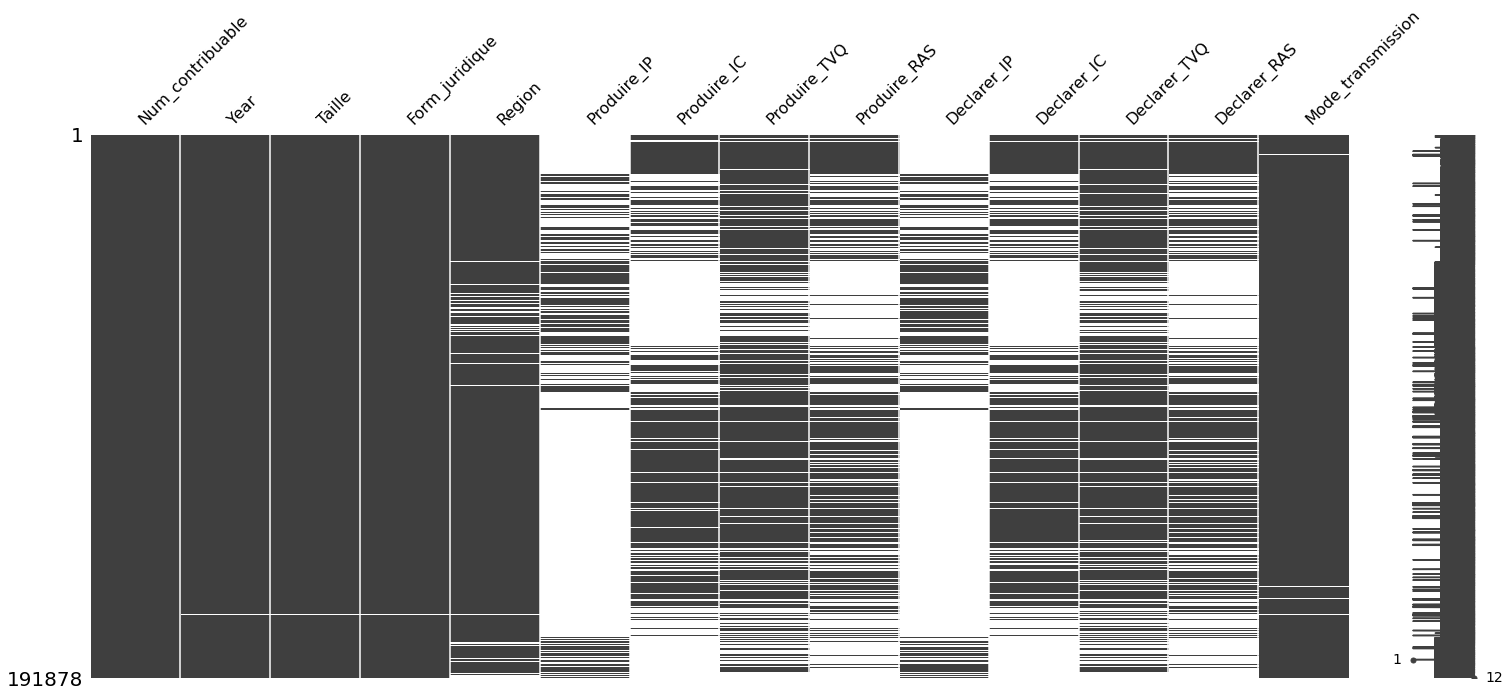

In [97]:
msno.matrix(data)

### Données manquantes pour les entreprises

In [5]:
# data_IC = data[['Num_contribuable', 'Year', 'Taille', 
#                 'Form_juridique', 'Region', 'Produire_IC', 
#                 'Produire_TVQ', 'Produire_RAS', 'Declarer_IC', 
#                 'Declarer_TVQ', 'Declarer_RAS', 'Mode_transmission']]

data_IC = data[data['Form_juridique'] == 'C']
msno.matrix(data_IC)

NameError: name 'msno' is not defined

### Données manquantes pour les particuliers 

<Axes: >

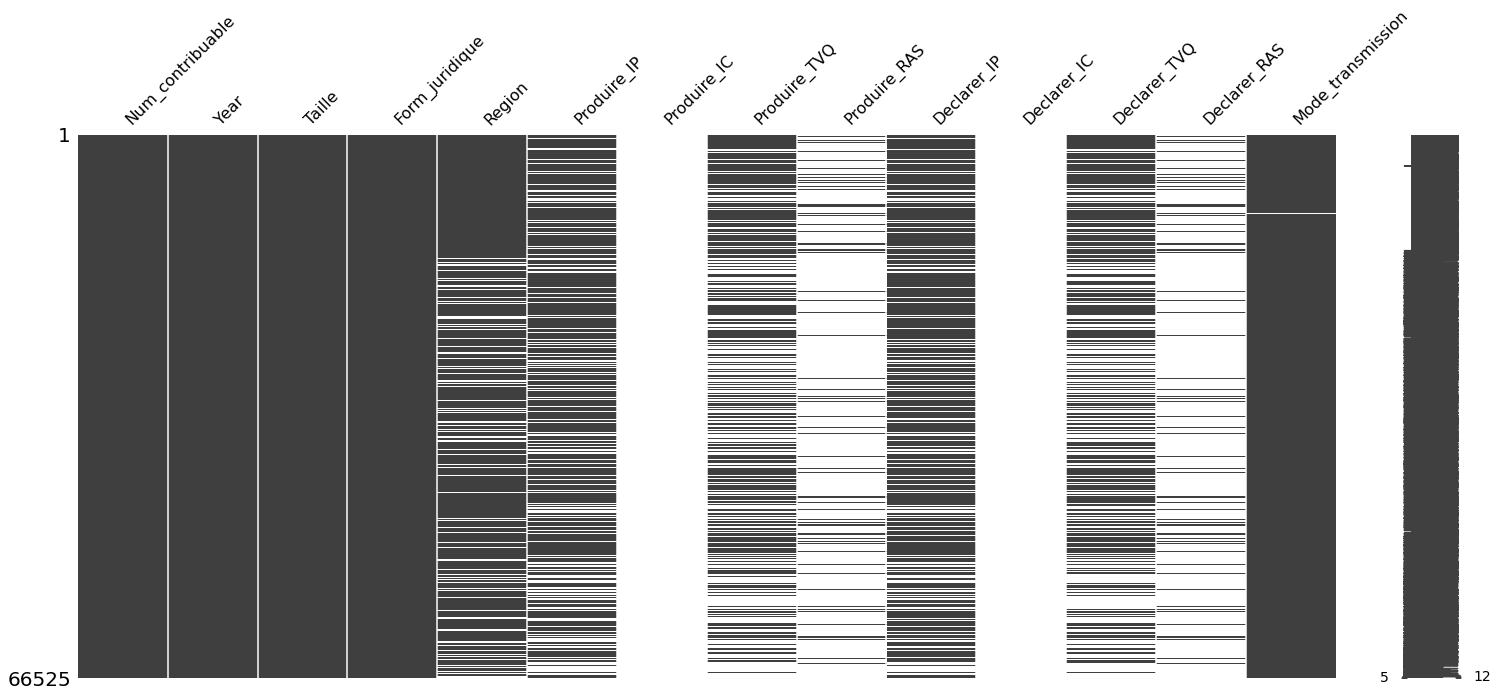

In [99]:
# data_IP = data[['Num_contribuable', 'Year', 'Taille', 'Form_juridique', 
#                 'Region', 'Produire_IP', 'Produire_TVQ', 'Produire_RAS', 
#                 'Declarer_IC', 'Declarer_TVQ', 'Declarer_RAS', 'Mode_transmission']]

data_IP = data[data['Form_juridique'] == 'P']
msno.matrix(data_IP)

## Fonctions de preprocessing

In [86]:
def clean_names(my_df):
    '''
        In the dataframe, formats the players'
        names so each word start with a capital letter.

        Returns:
            The df with formatted names
    '''
    my_df['Taille'] = my_df.loc[:,'Taille'].str.capitalize()
    my_df['Region'] = my_df.loc[:,'Region'].str.capitalize()
    my_df['Mode_transmission'] = my_df.loc[:,'Mode_transmission'].str.capitalize()
    return my_df

def convert_types(my_df, IC_or_IP):
    '''
        Converts the decimal values into integer as we have binary variables and Year

        args:
            my_df: The dataframe to preprocess
        returns:
            The dataframe with rounded numbers
    '''
    my_df['Year'] = my_df['Year'].astype('int')
    if IC_or_IP == 'IP':
      my_df['Produire_IP'] = my_df.loc[:,'Produire_IP'].astype('Int64')
      my_df['Declarer_IP'] = my_df.loc[:,'Declarer_IP'].astype('Int64')
    elif IC_or_IP == 'IC':
      my_df['Produire_IC'] = my_df.loc[:,'Produire_IC'].astype('Int64')
      my_df['Declarer_IC'] = my_df.loc[:,'Declarer_IC'].astype('Int64')

    my_df['Produire_RAS'] = my_df.loc[:,'Produire_RAS'].astype('Int64')
    my_df['Declarer_RAS'] = my_df.loc[:,'Declarer_RAS'].astype('Int64')
  
    my_df['Produire_TVQ'] = my_df.loc[:,'Produire_TVQ'].astype('Int64')
    my_df['Declarer_TVQ'] = my_df.loc[:,'Declarer_TVQ'].astype('Int64')
    return my_df

def remove_missing_values(my_df, IC_or_IP):
    '''
        We remove all missing values, not taking into account the absence of IC or IQ column, as they are
        constrained to a logical rule

        args:
            my_df: The dataframe to preprocess
        returns:
            The dataframe with rounded numbers
    '''
    print("Lignes avant la suppression des valeurs manquantes : ", len(my_df))

    if IC_or_IP == 'IC':
      # Dans ce cas, si nous sommes dans la configuration contribuable, les valeurs NaN sont de vraies données manquantes
      my_df = my_df.dropna(subset=['Year', 'Taille', 'Form_juridique', 
                                   'Region', 'Mode_transmission', 'Produire_RAS', 'Declarer_RAS', 
                                   'Declarer_TVQ', 'Produire_TVQ',
                                   'Declarer_IC', 'Produire_IC'])
    elif IC_or_IP == 'IP':
      # Dans ce cas, si nous sommes dans la configuration contribuable, les valeurs NaN sont de vraies données manquantes

      # Pour les particuliers, la partie RAS est majoritairement vide, donc on supprime beaucoup trop de données
      # Peut-être voir si le revenu à la source est démocratisé ou non au Québec, auquel cas il faudra mettre une règle ou combler par des 0 pour dire 
      # qu'ils ne la déclarent pas (biais)
      my_df = my_df.dropna(subset=['Year', 'Taille', 'Form_juridique', 
                                   'Region', 'Mode_transmission', 'Produire_RAS', 'Declarer_RAS', 
                                   'Declarer_TVQ', 'Produire_TVQ',
                                   'Declarer_IP', 'Produire_IP'])
    else:
      raise Exception("Choisir IC ou IP pour les modalités")
      
    print("Lignes après la suppression des valeurs manquantes : ", len(my_df))

    return my_df

def sort_by_yr(my_df):
    '''
        Sorts the dataframe by year and then by continent.

        args:
            my_df: The dataframe to sort
        returns:
            The sorted dataframe.
    '''
    my_df.sort_values(by=['Year'], inplace = True)
    return my_df

def combine_dfs(df1, df2):
    '''
        Combines the two dataframes

        args:
            df1: The first dataframe to combine
            df2: The second dataframe, to be appended to the first
        returns:
            The dataframe containing both dataframes provided as arg.
            Each row of the resulting dataframe has a column 'Year'
            containing the value 2000 or 2015, depending on its
            original dataframe.
    '''
    df_whole = df1.append(df2, ignore_index=True)

    return df_whole

def group_and_get_sum_per_obligation(list_of_keys, my_df):
    '''
        Sums each player's total of number of lines and  its
        corresponding percentage per act.

        The sum of lines per player per act is in a new
        column named 'PlayerLine'.

        The percentage of lines per player per act is
        in a new column named 'PlayerPercent'

        Args:
            my_df: The pandas dataframe containing the data from the .csv file
        Returns:
            The modified pandas dataframe containing the
            information described above.
    '''
    my_df = my_df.groupby(list_of_keys).agg({'Produire_IP': 'sum', 'Declarer_IP': 'sum',
                                                    'Produire_IC': 'sum', 'Declarer_IC': 'sum',
                                                    'Produire_RAS': 'sum', 'Declarer_RAS': 'sum',
                                                    'Produire_TVQ': 'sum', 'Declarer_TVQ': 'sum'})
    my_df.columns = ['Produire_IP_à_temps', 'Declarer_IP_sans_erreurs', 
                                'Produire_IC_à_temps', 'Declarer_IC_sans_erreurs',
                                'Produire_RAS_à_temps', 'Declarer_RAS_sans_erreurs',
                                'Produire_TVQ_à_temps', 'Declarer_TVQ_sans_erreurs', ]
    my_df = my_df.reset_index()
    return my_df


def group_and_get_means_per_obligation(list_of_keys, my_df):
    '''
        Sums each player's total of number of lines and  its
        corresponding percentage per act.

        The sum of lines per player per act is in a new
        column named 'PlayerLine'.

        The percentage of lines per player per act is
        in a new column named 'PlayerPercent'

        Args:
            my_df: The pandas dataframe containing the data from the .csv file
        Returns:
            The modified pandas dataframe containing the
            information described above.
    '''
    my_df = my_df.groupby(list_of_keys).agg({'Produire_IP': 'mean', 'Declarer_IP': 'mean',
                                                    'Produire_IC': 'mean', 'Declarer_IC': 'mean',
                                                    'Produire_RAS': 'mean', 'Declarer_RAS': 'mean',
                                                    'Produire_TVQ': 'mean', 'Declarer_TVQ': 'mean'})
    my_df.columns = ['Produire_IP_à_temps', 'Declarer_IP_sans_erreurs', 
                                'Produire_IC_à_temps', 'Declarer_IC_sans_erreurs',
                                'Produire_RAS_à_temps', 'Declarer_RAS_sans_erreurs',
                                'Produire_TVQ_à_temps', 'Declarer_TVQ_sans_erreurs', ]
    my_df = my_df.reset_index()
    return my_df

In [ ]:
data_IC = data[data['Form_juridique'] == 'C']
data_IC = clean_names(data_IC)
data_IC = remove_missing_values(data_IC, 'IC')
data_IC = convert_types(data_IC, 'IC')
data_IC = sort_by_yr(data_IC)

In [ ]:
data_IP = data[data['Form_juridique'] == 'P']
data_IP = clean_names(data_IP)
data_IP = remove_missing_values(data_IP, 'IP')
data_IP = convert_types(data_IP, 'IP')
data_IP = sort_by_yr(data_IP)

In [168]:
data_IC

,Num_contribuable,Year,Taille,Form_juridique,Region,Produire_IP,Produire_IC,Produire_TVQ,Produire_RAS,Declarer_IP,Declarer_IC,Declarer_TVQ,Declarer_RAS,Mode_transmission
0,1,2014,Moyenne,C,Montreal,NaN,1,1,0,NaN,0,1,1,Logiciel
19207,3835,2014,Petite,C,Lanaudiere,NaN,0,0,0,NaN,1,1,0,Logiciel
149893,29888,2014,Petite,C,Laurentides,NaN,0,0,0,NaN,0,1,0,Logiciel
133855,26691,2014,Petite,C,Monteregie,NaN,0,0,0,NaN,1,1,1,Logiciel
19192,3832,2014,Petite,C,Lanaudiere,NaN,0,1,1,NaN,0,0,1,Logiciel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137793,27475,2018,Petite,C,Laval,NaN,0,0,0,NaN,0,1,1,Logiciel
137792,27474,2018,Petite,C,Laurentides,NaN,0,0,0,NaN,1,1,0,Logiciel
83299,16633,2018,Moyenne,C,Monteregie,NaN,1,1,0,NaN,0,1,0,Logiciel
83308,16635,2018,Petite,C,Monteregie,NaN,0,0,0,NaN,0,1,0,Logiciel


In [169]:
data_IP

,Num_contribuable,Year,Taille,Form_juridique,Region,Produire_IP,Produire_IC,Produire_TVQ,Produire_RAS,Declarer_IP,Declarer_IC,Declarer_TVQ,Declarer_RAS,Mode_transmission
30737,6137,2014,Petite,P,Lanaudiere,1,NaN,0,0,1,NaN,1,1,Logiciel
74897,14959,2014,Petite,P,Monteregie,1,NaN,0,0,1,NaN,1,1,Logiciel
28501,5691,2014,Petite,P,Bas-saint-laurent,1,NaN,1,0,1,NaN,1,1,Logiciel
75309,15040,2014,Petite,P,Lanaudiere,0,NaN,0,0,0,NaN,1,0,Logiciel
28485,5688,2014,Petite,P,Capitale-nationale,1,NaN,1,1,1,NaN,1,1,Logiciel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61610,12307,2018,Petite,P,Bas-saint-laurent,1,NaN,1,1,1,NaN,1,0,Logiciel
44504,8888,2018,Petite,P,Saguenay-lac-saint-jean,1,NaN,1,0,1,NaN,1,0,Logiciel
90111,17990,2018,Petite,P,Monteregie,0,NaN,1,0,0,NaN,1,1,Logiciel
44679,8923,2018,Petite,P,Monteregie,1,NaN,0,0,0,NaN,1,0,Logiciel


#### Fusion des datasets IC et IP après leurs nettoyages respectifs

In [170]:
data_whole = combine_dfs(data_IC,data_IP)

<ipython-input-165-5538cfcf6443>:98: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_whole = df1.append(df2, ignore_index=True)


In [171]:
data_whole

,Num_contribuable,Year,Taille,Form_juridique,Region,Produire_IP,Produire_IC,Produire_TVQ,Produire_RAS,Declarer_IP,Declarer_IC,Declarer_TVQ,Declarer_RAS,Mode_transmission
0,1,2014,Moyenne,C,Montreal,<NA>,1,1,0,<NA>,0,1,1,Logiciel
1,3835,2014,Petite,C,Lanaudiere,<NA>,0,0,0,<NA>,1,1,0,Logiciel
2,29888,2014,Petite,C,Laurentides,<NA>,0,0,0,<NA>,0,1,0,Logiciel
3,26691,2014,Petite,C,Monteregie,<NA>,0,0,0,<NA>,1,1,1,Logiciel
4,3832,2014,Petite,C,Lanaudiere,<NA>,0,1,1,<NA>,0,0,1,Logiciel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89745,12307,2018,Petite,P,Bas-saint-laurent,1,<NA>,1,1,1,<NA>,1,0,Logiciel
89746,8888,2018,Petite,P,Saguenay-lac-saint-jean,1,<NA>,1,0,1,<NA>,1,0,Logiciel
89747,17990,2018,Petite,P,Monteregie,0,<NA>,1,0,0,<NA>,1,1,Logiciel
89748,8923,2018,Petite,P,Monteregie,1,<NA>,0,0,0,<NA>,1,0,Logiciel


### Moyenne en groupant par année 

In [197]:
data_year_mean = group_and_get_means_per_obligation(['Year'], data_whole)
data_year_mean

,Year,Produire_IP_à_temps,Declarer_IP_sans_erreurs,Produire_IC_à_temps,Declarer_IC_sans_erreurs,Produire_RAS_à_temps,Declarer_RAS_sans_erreurs,Produire_TVQ_à_temps,Declarer_TVQ_sans_erreurs
0,2014,0.458618,0.367502,0.459254,0.473017,0.344433,0.453352,0.380407,0.495363
1,2015,0.473058,0.389083,0.452256,0.468287,0.343001,0.454614,0.387403,0.492648
2,2016,0.472549,0.281046,0.450727,0.468274,0.346337,0.450098,0.383669,0.492902
3,2017,0.474409,0.353675,0.458115,0.469595,0.372542,0.441632,0.386036,0.485094
4,2018,0.447761,0.365316,0.462986,0.483473,0.335263,0.445919,0.393458,0.49408


In [194]:
data_year_sum = group_and_get_sum_per_obligation(['Year'], data_whole)
data_year_sum

,Year,Produire_IP_à_temps,Declarer_IP_sans_erreurs,Produire_IC_à_temps,Declarer_IC_sans_erreurs,Produire_RAS_à_temps,Declarer_RAS_sans_erreurs,Produire_TVQ_à_temps,Declarer_TVQ_sans_erreurs
0,2014,604,484,6774,6977,5534,7284,6112,7959
1,2015,676,556,7166,7420,5925,7853,6692,8510
2,2016,723,430,7629,7926,6392,8307,7081,9097
3,2017,723,539,8061,8263,7123,8444,7381,9275
4,2018,630,514,8068,8425,6314,8398,7410,9305


### Moyenne avec un groupement plus complexe

In [199]:
data_year_mean

,Year,Produire_IP_à_temps,Declarer_IP_sans_erreurs,Produire_IC_à_temps,Declarer_IC_sans_erreurs,Produire_RAS_à_temps,Declarer_RAS_sans_erreurs,Produire_TVQ_à_temps,Declarer_TVQ_sans_erreurs
0,2014,0.458618,0.367502,0.459254,0.473017,0.344433,0.453352,0.380407,0.495363
1,2015,0.473058,0.389083,0.452256,0.468287,0.343001,0.454614,0.387403,0.492648
2,2016,0.472549,0.281046,0.450727,0.468274,0.346337,0.450098,0.383669,0.492902
3,2017,0.474409,0.353675,0.458115,0.469595,0.372542,0.441632,0.386036,0.485094
4,2018,0.447761,0.365316,0.462986,0.483473,0.335263,0.445919,0.393458,0.49408
